<a href="https://colab.research.google.com/github/hamzarabi3/Bike-sharing-data-analysis-case-study/blob/main/Cyclics_bike_sharing_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Does a Bike-Share Navigate Speedy Success? 

## Introduction
**1. About the company** 


<img src='https://images.unsplash.com/photo-1565444872947-6fd5f91ee0f0?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=889&q=80'/>


In 2016, Cyclistic launched a successful bike-share oering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One
approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and
annual memberships.

Customers who purchase single-ride or full-day passes are referred to as *casual riders*. Customers who purchase annual memberships are *Cyclistic members*.

**2. Business Task**
* Identify the differences between Casual riders and Cyclistic members in their use of Cyclics bikes.

**3. Stakeholders**
* Primary stakeholder : Lily Monero (Director of Marketing)
* Secondary Stakeholders : Cyclistic Marketing analytics team





In [ ]:
import pandas as pd
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## Preparation

**1. Download the data**

In [ ]:
%%shell
# cd /content/drive/MyDrive/DATAsets/Cyclistic

# wget https://divvy-tripdata.s3.amazonaws.com/202004-divvy-tripdata.zip 
# wget https://divvy-tripdata.s3.amazonaws.com/202006-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202007-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202008-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202009-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202010-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202011-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202012-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip
# wget https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip

# unzip \*.zip
# rm /content/drive/MyDrive/DATAsets/Cyclistic/*.zip
# rm -d -r /content/drive/MyDrive/DATAsets/Cyclistic/__MACOSX

cp -r /content/drive/MyDrive/DATAsets/Cyclistic /content

In [ ]:
path='/content/Cyclistic'

**2. About the dataset ?** 

We will be using a public dataset published by [Divvy](https://www.divvybikes.com/about) : 

>Divvy is Chicagoland’s bike share system across Chicago and Evanston. Divvy provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago.


This dataset is made public under this [license](https://www.divvybikes.com/data-license-agreement) which grants us the right to *access, reproduce, analyze, copy, modify, distribute in your product or service and use the Data for any lawful purpose.*

The dataset consists of 12 csv files corresponding to 12 months of Divvy's customer data from April 2020 to March 2021. Considering the time of the analysis, this dataset is perfectly **current**. 

## Processing

In [ ]:
files=listdir(path)

**1. Merge all in one file**

In [ ]:
f=files[0]
all=pd.read_csv(path+'/'+f)

for f in files[1:]:
  df=pd.read_csv(path+'/'+f)
  all=all.append(df)

In [ ]:
len(all['ride_id'].unique()) #how many rides are there?

3489539

**2. Datetime columns**

In [ ]:
all['started_at']=pd.to_datetime(all['started_at'])
all['ended_at']=pd.to_datetime(all['ended_at'])

In [ ]:
all['ride_duration']=all['ended_at']-all['started_at'] 
all['ride_duration']=all['ride_duration'].dt.total_seconds()//60
all=all.query('ride_duration > 0') #ride duration must be positive

In [ ]:
d='start'
all[d+'_month']=all[d+'ed_at'].dt.month
all[d+'_dayofweek']=all[d+'ed_at'].dt.day_name()
all[d+'_quarter']=all[d+'ed_at'].dt.quarter
all[d+'_hour']=all[d+'ed_at'].dt.hour 

d='end'
all[d+'_month']=all[d+'ed_at'].dt.month
all[d+'_dayofweek']=all[d+'ed_at'].dt.day_name()
all[d+'_quarter']=all[d+'ed_at'].dt.quarter
all[d+'_hour']=all[d+'ed_at'].dt.hour 

In [ ]:
all.to_csv('/content/drive/MyDrive/Cyclistic_project/processed_divvy_dataset.csv',index=0)

In [ ]:
del all

## Analysis

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Cyclistic_project/processed_divvy_dataset.csv')
data['started_at']=pd.to_datetime(data['started_at'])
data['ended_at']=pd.to_datetime(data['ended_at'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data[['ride_duration']].describe()

,ride_duration
count,3.429432e+06
mean,2.785992e+01
std,2.546552e+02
min,1.000000e+00
25%,8.000000e+00
50%,1.400000e+01
75%,2.600000e+01
max,5.872000e+04


In [ ]:
data.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,start_month,start_dayofweek,start_quarter,start_hour,end_month,end_dayofweek,end_quarter,end_hour
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,9.0,11,Sunday,4,13,11,Sunday,4,13
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,11.0,11,Sunday,4,10,11,Sunday,4,10
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,29.0,11,Sunday,4,0,11,Sunday,4,1


**1. Rides count**

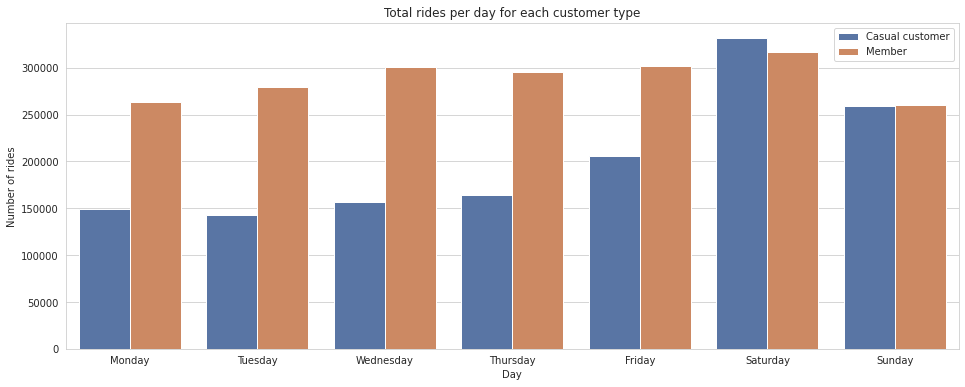

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,
             x='start_dayofweek',
             hue='member_casual',
             palette='deep',
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
             );

plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.title('Total rides per day for each customer type');
plt.legend(['Casual customer','Member'])
plt.savefig('/content/drive/MyDrive/Cyclistic_project/rides_per_day.png');

In [ ]:
months=[4,5,6,7,8,9,10,11,12,1,2,3]

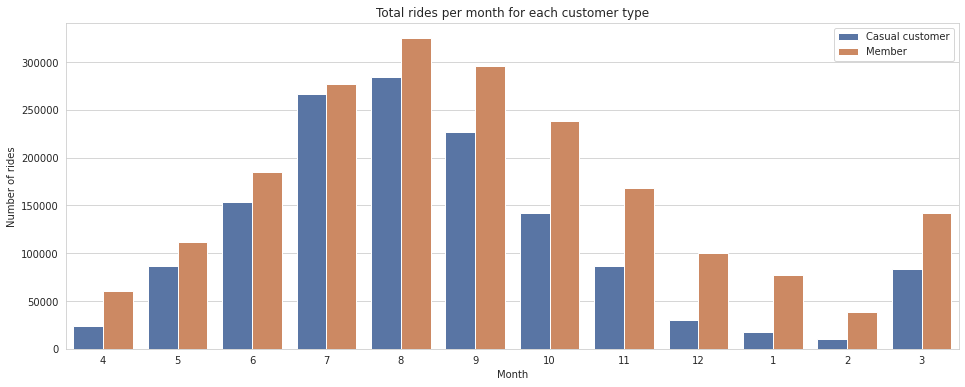

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,
             x='start_month',
             hue='member_casual',
             palette='deep',
              order=months
             );

plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.title('Total rides per month for each customer type');
plt.legend(['Casual customer','Member'])
plt.savefig('/content/drive/MyDrive/Cyclistic_project/rides_per_month.png');

> From the above visuals we can spot some key differences : 
> *  Casual members daily rides count is at its max on weekends
> *  Although, Members rides count is minimal on weekends, their demand on rides is fairly stable and it remains between 250k and slightly surpasses 300k on Saturday compared to casual customers demand which goes from less than 150k in workdays to more than 300k on Saturdays. 
> * The demand on bike sharing service changes significantly around the year, this is probabliy because it snows in winter in Chicago.

**2. Ride duration**

In [ ]:
pd.pivot_table(data,index='member_casual',values='ride_duration',aggfunc=[np.mean,np.std])

,mean,std
,ride_duration,ride_duration
member_casual,,
casual,45.014347,380.497717
member,15.879930,93.170724


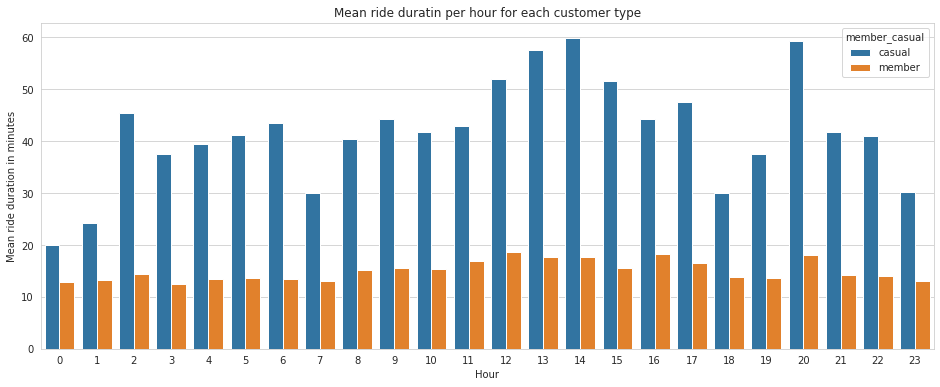

In [ ]:
T=data.groupby(['start_hour','member_casual']).mean().reset_index()[['start_hour','member_casual','ride_duration']]
plt.figure(figsize=(16,6))
sns.barplot(data=T,x='start_hour',y='ride_duration',hue='member_casual')
plt.xlabel('Hour')
plt.ylabel('Mean ride duration in minutes')
plt.title('Mean ride duratin per hour for each customer type');
#plt.legend(['Casual customer','Member'])

plt.savefig('/content/drive/MyDrive/Cyclistic_project/mean_ride_duration_per_hour.png');

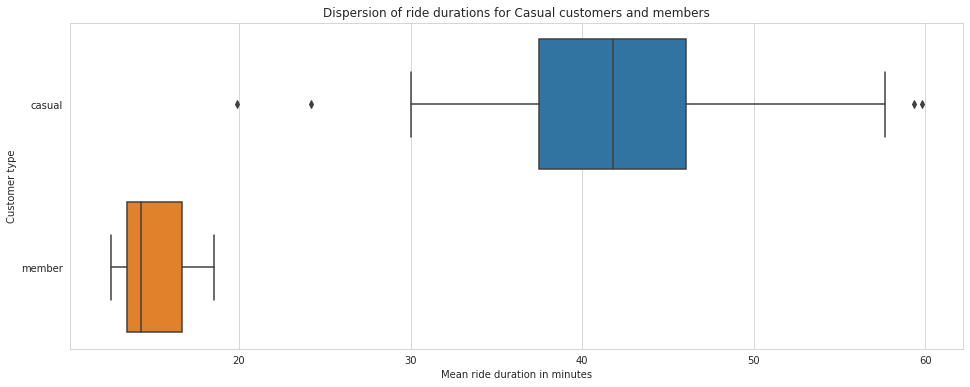

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(data=T,y='member_casual',x='ride_duration')
plt.ylabel('Customer type')
plt.xlabel('Mean ride duration in minutes')
plt.title('Dispersion of ride durations for Casual customers and members');

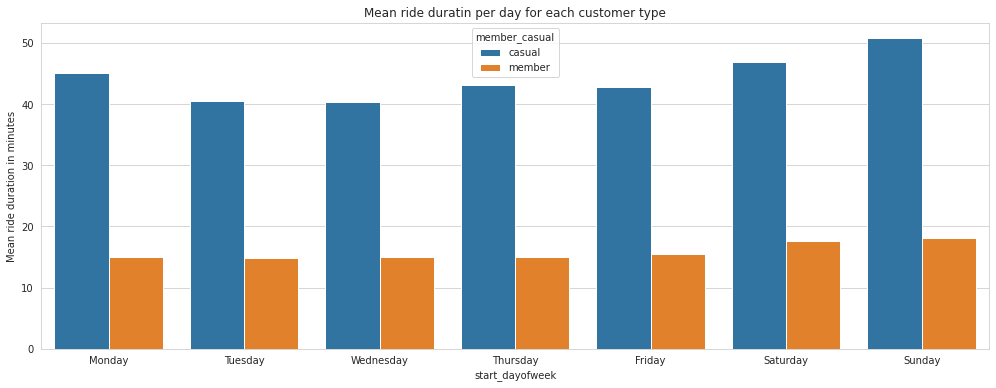

In [ ]:
T=data.groupby(['start_dayofweek','member_casual']).mean().reset_index()[['start_dayofweek','member_casual','ride_duration']]
plt.figure(figsize=(17,6))
sns.barplot(data=T,x='start_dayofweek',y='ride_duration',hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Mean ride duration in minutes')
plt.title('Mean ride duratin per day for each customer type');
#plt.legend(['Casual customer','Member'])

plt.savefig('/content/drive/MyDrive/Cyclistic_project/mean_rides_duration_per_day.png');

> * The average duration of a casual rides is 3 times that of a member's ride. 
> * Members ride durations are short and show less dispersion